# Javier Palomares Homework 1 b

## 1. Correlations

* When given a data matrix, an easy way to tell if any two columns are correlated is to look at a scatter plot of each column against each other column. For a warm up, do this: Look at the data in DF1 in HW1b Data.zip.

In [21]:
df1FilePath="./DF1"
df2FilePath="./DF2"

import pandas as pd
df1 = pd.read_csv(df1FilePath,index_col=0)
df2 = pd.read_csv(df2FilePath,index_col=0)
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
0    10000 non-null float64
1    10000 non-null float64
2    10000 non-null float64
3    10000 non-null float64
dtypes: float64(4)
memory usage: 390.6 KB


,0,1,2,3
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.007704,0.009313,0.007586,-0.008455
std,1.000779,1.002686,1.000794,1.002581
min,-3.471566,-4.056024,-3.524182,-3.930215
25%,-0.663449,-0.663886,-0.666489,-0.697856
50%,0.017736,0.009027,0.012372,-0.007986
75%,0.667565,0.695943,0.672933,0.668582
max,3.854101,3.908736,3.608846,3.985592


 Which columns are (pairwise) correlated? Figure out how to do this with Pandas, and also how to do this with Seaborn. 

In [37]:
df1.corr()

,0,1,2,3
0,1.000000,-0.003998,0.990066,0.004111
1,-0.003998,1.000000,-0.004085,-0.990235
2,0.990066,-0.004085,1.000000,0.004067
3,0.004111,-0.990235,0.004067,1.000000


Using pandas, we see that columns at position 0 and position 2 are correlated, and columns at position 1 and 3 are negatively correlated

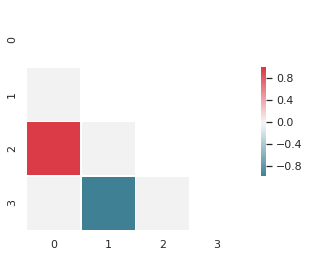

In [38]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style='white')
corr1 = df1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots();

# Generate a custom diverging colorma# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Using seaborn, I can see the correlation between columns 0 and 2, and the negative correlation between columns 1 and 3

* Compute the covariance matrix of the data. Write the explicit expression for what this
is, and then use any command you like (e.g., np.cov) to compute the 4 × 4 matrix.
Explain why the numbers that you get fit with the plots you got.

Let DF1 have size $n \times n$.
Let $x_i$ be the i-th column of DF1 and $x_i[j]$ be the j-th component of $x_i$.  
Note that columns of DF1 have $n$ components.
Let $\mu_i$ be the mean of $x_i$ and let $\sigma^2$ be the variance of $x_i$.  
Then the $i,j$ entry of the covariance matrix is given by:

$cov_{ij} =  \frac{1}{n} \sum_{k=1}^{n} (x_i[k] - \mu_i)(x_j[k] - \mu_j) $

In [39]:
df1.cov()

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


The values in the covariance matrix are consistent with the values in the correlation as they differ by a normalization factor.

* The above problem in reverse. Generate a zero-mean multivariate Gaussian random
variable in 3 dimensions, Z = (X1, X2, X3) so that (X1, X2) and (X1, X3) are uncorrelated, but (X2, X3) are correlated. Specifically: choose a covariance matrix that has the
above correlations structure, and write this down. Then find a way to generate samples
from this Gaussian. Choose one of the non-zero covariance terms (Cij , if C denotes
your covariance matrix) and plot it vs the estimated covariance term, as the number of
samples you use scales. The goal is to get a visual representation of how the empirical
covariance converges to the true (or family) covariance.

In [79]:
def estimateGaussianCov(mean,cov,numSamples,i,j):
    x = np.random.multivariate_normal(mean, cov,numSamples).T
    estCov = np.cov(x)
    c_ij = estCov[i][j]
    error = c_ij - cov[i][j]
    return error

mean = [0,0,0]
cov = [[1,0,0],[0,1,.99],[0,.99,1]]
#c_1,2 is non zero
i = 1
j = 2
numSamples = list(range(10,10000000,100000))
err = np.zeros(len(numSamples))
for k in range(len(numSamples)):
    n = numSamples[k]
    err[k] = estimateGaussianCov(mean,cov,n,i,j)

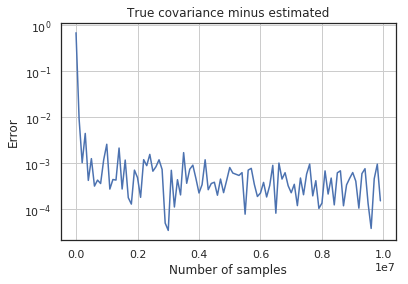

In [85]:
err = abs(err)
plt.semilogy(numSamples,err)
plt.title("True covariance minus estimated")
plt.grid(True)
plt.xlabel("Number of samples")
plt.ylabel("Absolute value of error")
plt.show()

## 2. Outliers
Consider the two-dimensional data in DF2 in HW1b Data.zip. Look at a scatter
plot of the data. It contains two points that look like potential outliers. Which one is “more”
outlying? Propose a transformation of the data that makes it clear that the point at (−1, 1)
is more outlying than the point at (5.5, 5), even though the latter point is“farther away”
from the nearest points. Plot the data again after performing this transformation. Provide
discussion as appropriate to justify your choice of transformation. Hint: if $y$ comes from a
standard Gaussian in two dimensions (i.e., with covariance equal to the two by two identity
matrix), and
$$
Q=
\begin{pmatrix}
2 & \frac{1}{2}\\
\frac{1}{2} & 2
\end{pmatrix}
$$
what is the covariance matrix of the random variable $z = Qy$?If you are given $z$, how would
you create a random Gaussian vector with covariance equal to the identity, using z?


In [34]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
0    10000 non-null float64
1    10000 non-null float64
dtypes: float64(2)
memory usage: 234.4 KB


,0,1
count,10000.000000,10000.000000
mean,0.008139,0.008169
std,1.002321,1.002078
min,-3.471566,-3.524182
25%,-0.663686,-0.666489
50%,0.017736,0.012527
75%,0.667909,0.673805
max,5.500000,5.000000


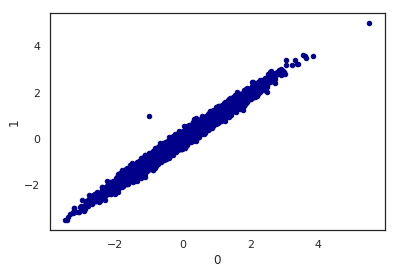

In [46]:
df2.plot.scatter(x=0,y=1,c='DarkBlue')

In [104]:
Q = [[2,1/2],[1/2,2]]
Q_inv = np.linalg.inv(Q)

In [110]:
test = np.dot(Q_inv,df2.T).T

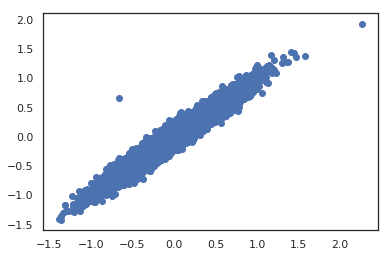

In [111]:
plt.scatter(test[:,0],test[:,1])
plt.show()

In [102]:
test.shape

(10000, 2)

## 3. Even More Standard Error 
(This is to be completed only after you’ve completed the
last written exercise below). In one of the written exercises below, you derive an expression
1for what is called the Standard Error: where $\beta$ denotes the “truth,” $\hat{\beta}$ denotes the value we
compute using least squares linear regression, and $Z$ and $e$ are as in the exercise below, you
find:
$\hat{\beta} − \beta = Ze$.
If we know the distribution of the noise (the distribution generating the noise vectors, e i ),
then we know the distribution for the error, ( $\hat{\beta} − \beta$). This allows us to answer the question
given in class: if we solve a regression and obtain value $\hat{\beta}$, how can we tell if it is statistically
significant? The answer is: we compare the size of β̂ to the spread introduced by the noise
(i.e., the standard error), and we ask: what is the likelihood that the true $\beta = 0$, and what
we observed was purely due to the noise.
If the noise is Gaussian (normal), i.e., $e_i ∼ N(0, \sigma^2 )$, and if the values of the $x_i$ are normalized,
then we expect error of the size $\frac{\sigma}{\sqrt{n}}$, as this is roughly the standard deviation of the
expression for the error that you derive above. This means: if you have twice the data points,
you should expect the error to be reduced by about 1.4 (the formula says that the standard
deviation of the error would decrease by a factor of $1/\sqrt{2}$).
Compute this empirically, as follows: We will generate data for a regression problem, solve
it, and see what the error is: Generate data as I did in the example from class: 
$x_i ∼ N (0, 1)$,
$e i ∼ N (0, 1)$. Generate $y$ by $y_i = \beta_0 + x_i\beta + e_i$ , where $\beta_0 = −3$ and $\beta = 0$. Note that
since  $\beta = 0$, this means that y and x are unrelated! The question we are exploring here is as
follows: when we solve a regression problem, we are not going to find  $\hat{\beta} = 0$ - we will find
that $\hat{\beta}$ takes some other values, hopefully close to zero. How do we know if the value of $\hat{\beta}$ we
get is statistically meaningful?

* By creating fresh data and each time computing $\hat{\beta}$ and recording $\hat{\beta}$ − $\beta$, compute the
empirical standard deviation of the error for n = 150 (the number we used in class). In
class, in the exercise where I tried to find a linear regression of y vs. noise, we found
$\hat{\beta}= −0.15$. Given your empirical computation of the standard deviation of the error,
how significant is the value −0.15?

* Now repeat the above experiment for different values of n. Plot these values, and on the
same plot, plot $1 / \sqrt{n}$. How is the fit?

## Names and Frequencies
The goal of this exercise is for you to get more experience with
Pandas, and to get a chance to explore a cool data set. Download the file Names.zip from
Canvas. This contains the frequency of all names that appeared more than 5 times on a social
security application from 1880 through 2015

* Write a program that on input k and XXXX, returns the top k names from year
XXXX.

In [46]:
import pandas as pd
def topKNames(k,year):
    # read the file containing the name frequency for the year
    filepath = "./Names/yob{}.txt".format(year)
    df = pd.read_csv(filepath,header=None)
    # first column of the dataframe is the name, followed by the gender and last by the frequency
    df.columns = ['name','gender','frequency']
    # sort the dataframe by the frequency in descending order
    df= df.sort_values(by='frequency',ascending=False)
    # return the name of the  first k rows of the data
    topKNames = df.iloc[0:k,0]
    return topKNames.to_list()

In [62]:
print(topKNames(7,1990))

['Michael', 'Christopher', 'Jessica', 'Ashley', 'Matthew', 'Joshua', 'Brittany']


* Write a program that on input Name returns the frequency for men and women of the
name $Name$.

In [101]:
# find the frequency of a name in a year for men and women
def freqMFNameByYear(name,year):
    # read the file containing the name frequency for the year
    filepath = "./Names/yob{}.txt".format(year)
    df = pd.read_csv(filepath,header=None)
    # first column of the dataframe is the name, followed by the gender and last by the frequency
    df.columns = ['name','gender','frequency']
    # find the rows for the give name using case insensitive comparison
    rows = df.loc[df['name'].str.lower() == name.lower()]
    # iterate over the rows
    menFrequency = 0
    womenFrequency = 0
    for index,row in rows.iterrows():
        if(row['gender'].lower() == 'm'):
            menFrequency += row['frequency']
        elif(row['gender'].lower() == 'f'):
            womenFrequency += row['frequency']
    return menFrequency,womenFrequency

In [105]:
men,women = freqMFNameByYear("Ashley",1990)
print("{} men were named Ashley in 1990. {} women were named Ashley in 1990".format(men,women))

239 men were named Ashley in 1990. 45553 women were named Ashley in 1990


* It could be that names are more diverse now than they were in 1880, so that a name may
be relatively the most popular, though its frequency may have been decreasing over the
years. Modify the above to return the relative frequency. Note that in the next coming
lectures we will learn how to quantify diversity using entropy.

In [136]:
def getTotalMWFreqByYear(year):
    filepath = "./Names/yob{}.txt".format(year)
    df = pd.read_csv(filepath,header=None)
     # first column of the dataframe is the name, followed by the gender and last by the frequency
    df.columns = ['name','gender','frequency']
    # find the total frequency for men and women
    menTotal = df.loc[df['gender'].str.lower() == "m"]['frequency'].sum()
    womenTotal = df.loc[df['gender'].str.lower() == "f"]['frequency'].sum() 
    return menTotal,womenTotal
    
# find the relative frequency of a name in a year for men and women
def relFreqMFNameByYear(name,year):
    # get the frequency of a name in a year for men and women
    men,women = freqMFNameByYear(name,year)
    menTotal,womenTotal = getTotalMWFreqByYear(year)
    return men/menTotal,women/womenTotal

In [137]:
men,women = relFreqMFNameByYear("Ashley",1990)
print("{}% of men were named Ashley in 1990. {}% of women were named Ashley in 1990".format(men*100,women*100))

0.011643417182176121% of men were named Ashley in 1990. 2.40029676358028% of women were named Ashley in 1990


* Find all the names that used to be more popular for one gender, but then became more
popular for another gender.

In [ ]:
# TODO: Finish this

## Visualization Tools and Missing/Hidden Values
Visualization is important both for
exploring the data, as well as for explaining what you have done. There are a huge number
of such tools now available. This exercise walks through various functionalities of matplotlib
and pandas.

* The first part of this exercise was created by Dataquest. Run through the commands
given in this tutorial: https://www.dataquest.io/blog/matplotlib-tutorial/ and understand the code.

### Exploring tweets with Pandas
* Import the Pandas library.
* Read tweets.csv into a Pandas DataFrame.
* Print the first 5 rows of the DataFrame

In [1]:
import pandas as pd
tweets = pd.read_csv("tweets.csv")
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


#### Generating a candidates column
* Create a function that finds what candidate names occur in a piece of text.
* Use the apply method on DataFrames to generate a new column called candidate that contains what candidate(s) the tweet mentions.

In [140]:
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)

tweets["candidate"] = tweets.apply(get_candidate,axis=1)

### Making the first plot
#### Importing matplotlib

In [141]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Making a bar plot
* Use the value_counts method on Pandas Series to count up how many tweets mention each candidate.
* Use plt.bar to create a bar plot. We'll pass in a list of numbers from 0 to the number of unique values in the candidate column as the x-axis input, and the counts as the y-axis input.
* Display the counts so we have more context about what each bar represents.

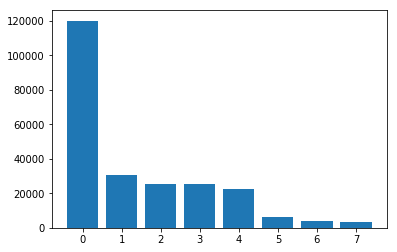

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


In [142]:
counts = tweets["candidate"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()

print(counts)

### Customizing plots
* Convert the created and user_created columns to the Pandas datetime type.
* Create a user_age column that is the number of days since the account was created.
* Create a histogram of user ages.
* Show the histogram.

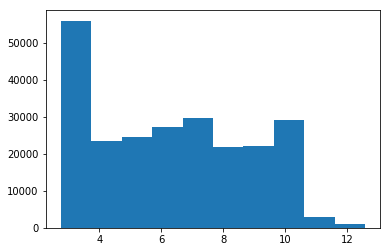

In [143]:
from datetime import datetime

tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)
plt.hist(tweets["user_age"])
plt.show()

#### Adding labels
* Generate the same histogram we did before.
* Draw a title onto the histogram.
* Draw an x axis label onto the histogram.
* Draw a y axis label onto the histogram.
* Show the plot.


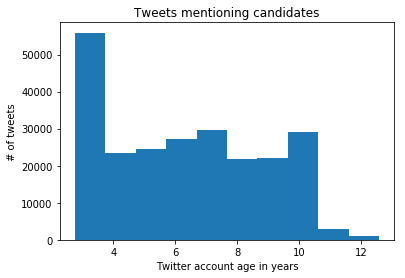

In [144]:
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

#### Making a stacked histogram

* Generate three Pandas series, each containing the user_age data only for tweets about a certain candidate.
* Make a stacked histogram by calling the hist method with additional options.
    * Specifying a list as the input will plot three sets of histogram bars.
    * Specifying stacked=True will stack the three sets of bars.
    * Adding the label option will generate the correct labels for the legend.
* Call the plt.legend method to draw a legend in the top right corner.
* Add a title, x axis, and y axis labels.
* Show the plot.

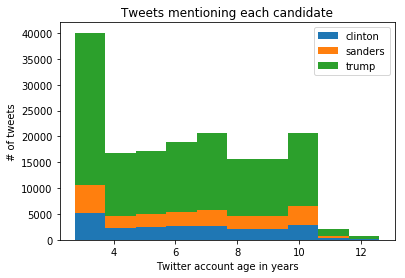

In [146]:
cl_tweets = tweets["user_age"][tweets["candidate"] == "clinton"]
sa_tweets = tweets["user_age"][tweets["candidate"] == "sanders"]
tr_tweets = tweets["user_age"][tweets["candidate"] == "trump"]
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

#### Annotating the histogram

In the code below, we'll make the same histogram as we did above, but we'll call the plt.annotate method to add an annotation to the plot.

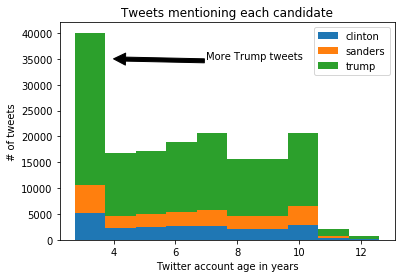

In [167]:
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.annotate('More Trump tweets', xy=(4, 35000), xytext=(7, 35000),
            arrowprops=dict(facecolor='black'))
plt.show()

### Multiple subplots
#### Extracting colors
* Use the apply method to go through each row in the user_bg_color column, and extract how much red is in it.
* Use the apply method to go through each row in the user_bg_color column, and extract how much blue is in it.

In [168]:
import matplotlib.colors as colors

tweets["red"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[0])
tweets["blue"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[2])

#### Creating the plot
* Generate a Figure and multiple Axes with the subplots method. The axes will be returned as an array.
* The axes are returned in a 2x2 NumPy array. We extract each individual Axes object by using the flat property of arrays. This gives us 4 Axes objects we can work with.
* Plot a histogram in the first Axes using the hist method.
* Set the title of the first Axes to Red in all backgrounds using the set_title method. This performs the same function as plt.title.
* Plot a histogram in the second Axes using the hist method.
* Set the title of the second Axes to Red in Trump tweeters using the set_title method.
* Plot a histogram in the third Axes using the hist method.
* Set the title of the third Axes to Blue in all backgrounds using the set_title method. This performs the same function as plt.title.
* Plot a histogram in the fourth Axes using the hist method.
* Set the title of the fourth Axes to Blue in Trump tweeters using the set_title method.
* Call the plt.tight_layout method to reduce padding in the graphs and fit all the elements.
* Show the plot.

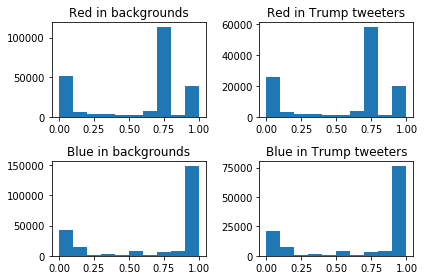

In [169]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat

ax0.hist(tweets["red"])
ax0.set_title('Red in backgrounds')

ax1.hist(tweets["red"][tweets["candidate"] == "trump"].values)
ax1.set_title('Red in Trump tweeters')

ax2.hist(tweets["blue"])
ax2.set_title('Blue in backgrounds')

ax3.hist(tweets["blue"][tweets["candidate"] == "trump"].values)
ax3.set_title('Blue in Trump tweeters')

plt.tight_layout()
plt.show()

#### Removing common background colors
Here's how to find the most common colors in background colors:

In [171]:
tweets["user_bg_color"].value_counts()

C0DEED    108977
000000     31119
F5F8FA     25597
131516      7731
1A1B1F      5059
022330      4300
0099B9      3958
642D8B      3767
FFFFFF      3101
9AE4E8      2651
ACDED6      2383
352726      2338
C6E2EE      1978
709397      1518
EBEBEB      1475
FF6699      1370
BADFCD      1336
FFF04D      1300
EDECE9      1225
B2DFDA      1218
DBE9ED      1113
ABB8C2      1101
8B542B      1073
3B94D9       623
89C9FA       414
DD2E44       351
94D487       318
4A913C       300
9266CC       287
F5ABB5       267
           ...  
BAE0F5         1
FBFBFB         1
F0488B         1
D0DBE0         1
878287         1
13BEED         1
233B47         1
8A2D5F         1
AA86B1         1
C2CC31         1
2028BD         1
332524         1
E50E06         1
8A868A         1
EAEBED         1
FCA9FC         1
993893         1
C20E0E         1
BF6F9C         1
FF7105         1
2288CC         1
F38630         1
09090A         1
1F1A1E         1
D9007E         1
5590AD         1
300030         1
0B4C5F        

* Remove C0DEED, 000000, and F5F8FA from user_bg_color.
* Create a function with out plotting logic from the last chart inside.
* Plot the same 4 plots from before without the most common colors in user_bg_color.

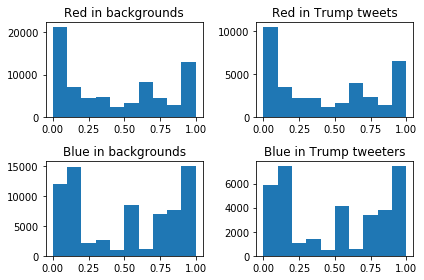

In [172]:
tc = tweets[~tweets["user_bg_color"].isin(["C0DEED", "000000", "F5F8FA"])]

def create_plot(data):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flat

    ax0.hist(data["red"])
    ax0.set_title('Red in backgrounds')

    ax1.hist(data["red"][data["candidate"] == "trump"].values)
    ax1.set_title('Red in Trump tweets')

    ax2.hist(data["blue"])
    ax2.set_title('Blue in backgrounds')

    ax3.hist(data["blue"][data["candidate"] == "trump"].values)
    ax3.set_title('Blue in Trump tweeters')

    plt.tight_layout()
    plt.show()

create_plot(tc)

### Plotting sentiment
* Group tweets by candidate, and compute the mean and standard deviation for each numerical column (including polarity).
* Create a Figure that's 7 inches by 7 inches, with 2 Axes objects, arranged vertically.
* Create a bar plot of the standard deviation the first Axes object.
    * Set the tick labels using the set_xticklabels method, and rotate the labels 45 degrees using the rotation argument.
    * Set the title.
* Create a bar plot of the mean on the second Axes object.
    * Set the tick labels.
    * Set the title.
* Show the plot.

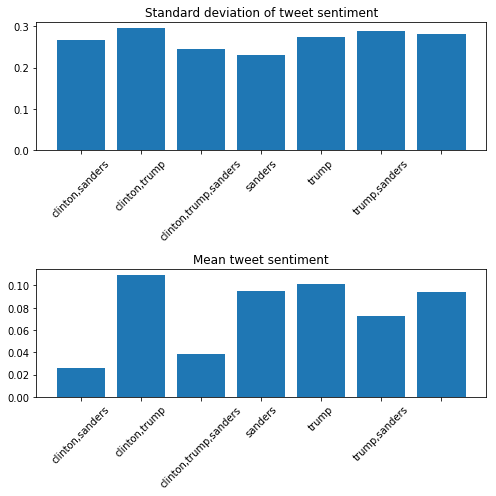

In [173]:
gr = tweets.groupby("candidate").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
ax0, ax1 = axes.flat

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]
ax0.bar(range(len(std)), std)
ax0.set_xticklabels(std.index, rotation=45)
ax0.set_title('Standard deviation of tweet sentiment')

ax1.bar(range(len(mean)), mean)
ax1.set_xticklabels(mean.index, rotation=45)
ax1.set_title('Mean tweet sentiment')

plt.tight_layout()
plt.show()

### Generating a side by side bar plot

#### Generating tweet lengths
* Define a function to mark a tweet as short if it's less than 100 characters, medium if it's 100 to 135 characters, and long if it's over 135 characters.
* Use apply to generate a new column tweet_length.
* Figure out how many tweets by each candidate fall into each group.

In [175]:
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

tweets["tweet_length"] = tweets["text"].apply(tweet_lengths)

tl = {}
for candidate in ["clinton", "sanders", "trump"]:
    tl[candidate] = tweets["tweet_length"][tweets["candidate"] == candidate].value_counts()

#### Plotting
* Create a Figure and a single Axes object.
* Define the width for each bar, .5.
* Generate a sequence of values, x, that is 0, 2, 4. Each value is the start of a category, such as short, medium, and long. We put a distance of 2 between each category so we have space for multiple bars.
* Plot clinton tweets on the Axes object, with the bars at the positions defined by x.
* Plot sanders tweets on the Axes object, but add width to x to move the bars to the right.
* Plot trump tweets on the Axes object, but add width * 2 to x to move the bars to the far right.
* Set the axis labels and title.
* Use set_xticks to move the tick labels to the center of each category area.
* Set tick labels.

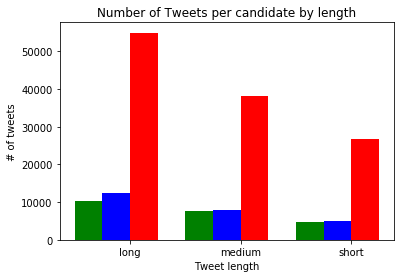

In [177]:

fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 6, 2))
ax.bar(x, tl["clinton"], width, color='g')
ax.bar(x + width, tl["sanders"], width, color='b')
ax.bar(x + (width * 2), tl["trump"], width, color='r')

ax.set_ylabel('# of tweets')
ax.set_title('Number of Tweets per candidate by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')
plt.show()

* Suppose that you would now like to plot some of the results by state. As you will see,
the state information is sometimes missing, and other times it comes in varying forms.
Figure out how to aggregate the results by state. The challenge here: how many of the
tweets can you (correctly) assign to a state? Note: depending on how well you want to
do (i.e., how many tweets you want to correctly assign to their state), this is not an easy
problem!

In [53]:
import json
import reverse_geocoder as rg
from geopy.geocoders import Nominatim
import numpy as np

geolocator = Nominatim(user_agent="Tweets_Analysis")
# the coordinates are given as a json string
# parse the string into a dictionary
def getCoordinates(geo):
    g = json.loads(geo)
    return g["coordinates"]
    
def getStateFromCoord(coord):
    location = rg.search(coord)
    state = np.nan
    if location:
        state = location[0]['admin1']
    return state

def getStateFromLoc(loc):
    location = geolocator.geocode(loc)
    state = np.nan
    if location: 
        coord = [location.latitude,location.longitude]
        state = getStateFromCoord(coord)
    return state

def getState(row):
    state = np.nan
    # try to get the state from a geolocation
    # or from the user's location
    geo = row["geo"]
    loc = row["user_location"]
    # map the geolocation to a state
    if(pd.isna(geo) == False):
        coord = getCoordinates(geo)
        state = getStateFromCoord(coord)
    # map the location to a state
    elif(pd.isna(loc) == False):
        state = getStateFromLoc(loc)
    return state

In [56]:
tweets["state"] = tweets.apply(getState,axis=1)

GeocoderQuotaExceeded: ('HTTP Error 429: Too Many Requests', 'occurred at index 573')

True

In [191]:
row = tweets.iloc[0,:]

In [57]:
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


In [219]:
from geopy.geocoders import Nominatim

In [220]:
geolocator = Nominatim(user_agent="Tweets_Analysis")

In [ ]:
location = geolocator.reverse(coord)

In [ ]:
location

In [2]:
import reverse_geocoder as rg

In [ ]:
results = rg.search(coord)

In [ ]:
print(results)

In [ ]:
coord

In [ ]:
print(coord)

In [5]:
tweets.shape

(237480, 15)

In [10]:
print(r)

id                                                             237480
id_str                                             730091163080896512
user_location                                                     NaN
user_bg_color                                                  FDF7D5
retweet_count                                                       0
user_name                                                    1230WSOK
polarity                                                     0.136364
created                                           2016-05-10T17:44:32
geo                                                               NaN
user_description                                                  NaN
user_created                                      2009-11-11T20:20:09
user_followers                                                     93
coordinates                                                       NaN
subjectivity                                                 0.454545
text                

In [23]:
r = None
for i,row in tweets.iterrows():
    g = row["geo"]
    if(pd.isna(g) == False):
        r = row
    

In [24]:
print(r)

id                                                             236356
id_str                                             730090937507033089
user_location                                                     UK 
user_bg_color                                                  C0DEED
retweet_count                                                       0
user_name                                             chris_underwood
polarity                                                         -0.2
created                                           2016-05-10T17:43:38
geo                 {"type": "Point", "coordinates": [51.5107298, ...
user_description    I blog, work on peacebuilding, open government...
user_created                                      2009-02-06T23:38:59
user_followers                                                   6586
coordinates         {"type": "Point", "coordinates": [-0.2436715, ...
subjectivity                                                      0.8
text                

In [18]:
f = row["geo"]

In [29]:
g = r[""]
print(g)

{"type": "Point", "coordinates": [51.5107298, -0.2436715]}


In [44]:
l = r["user_location"]
print(l)
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")
loca = geolocator.geocode(l)
loca.address

UK 


'UK'

In [21]:
import numpy as np

In [30]:
coord = getCoordinates(g)

In [31]:
print(coord)

[51.5107298, -0.2436715]


In [32]:
import reverse_geocoder as rg

In [33]:
results = rg.search(coord)

Loading formatted geocoded file...


In [50]:
geolocator.geocode('El Paso, TX').latitude

31.7600372

In [36]:
location = results

In [37]:
type(location)

list

In [38]:
location[0]['admin1']

'England'